In [2]:
#!pip install autots
from autots import AutoTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading data
data = pd.read_csv("Foreign_Exchange_Rates.xls")
data.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,Unnamed: 24
0,0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97,NaN
1,1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13,NaN
2,2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1,NaN
3,3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62,NaN
4,4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3,NaN


In [ ]:
#dropping null values and converting timeseries to datetime
data.dropna()
data['Time Serie'] = pd.to_datetime(data['Time Serie'], format='%d-%m-%Y')

In [ ]:
print(data.columns.tolist())

['Unnamed: 0', 'Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$', 'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$', 'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$', 'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$', 'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$', 'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$', 'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$', 'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$', 'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$', 'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$', 'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$', 'THAILAND - BAHT/US$', 'Unnamed: 24']


In [ ]:
#Pre-Processing code here
columns_to_drop = ['Unnamed: 0', 'Unnamed: 24'] if 'Unnamed: 0' in data.columns else []
data = data.drop(columns=columns_to_drop, errors='ignore')

# Convert currency columns to numeric
currency_columns = [col for col in data.columns if col != 'Time Serie']
for col in currency_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['Time Serie'] = pd.to_datetime(data['Time Serie'], errors='coerce')
data.dropna(subset=['Time Serie'], inplace=True) #drop invalid missing dates
#data.set_index('Time Serie', inplace=True)

In [ ]:
data.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [ ]:
# EDA code here
print(data.describe())

                          Time Serie  AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
count                           5217                        5019.000000   
mean   2009-12-31 09:36:19.873490688                           1.332015   
min              2000-01-03 00:00:00                           0.906900   
25%              2004-12-31 00:00:00                           1.115200   
50%              2009-12-31 00:00:00                           1.311000   
75%              2014-12-31 00:00:00                           1.430200   
max              2019-12-31 00:00:00                           2.071300   
std                              NaN                           0.269918   

       EURO AREA - EURO/US$  NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
count           5019.000000                          5019.000000   
mean               0.843904                             1.543683   
min                0.624600                             1.134600   
25%                0.750800                         

This graph shows the historical exchange rate of SRILANKAN RUPEE against the USD over time.


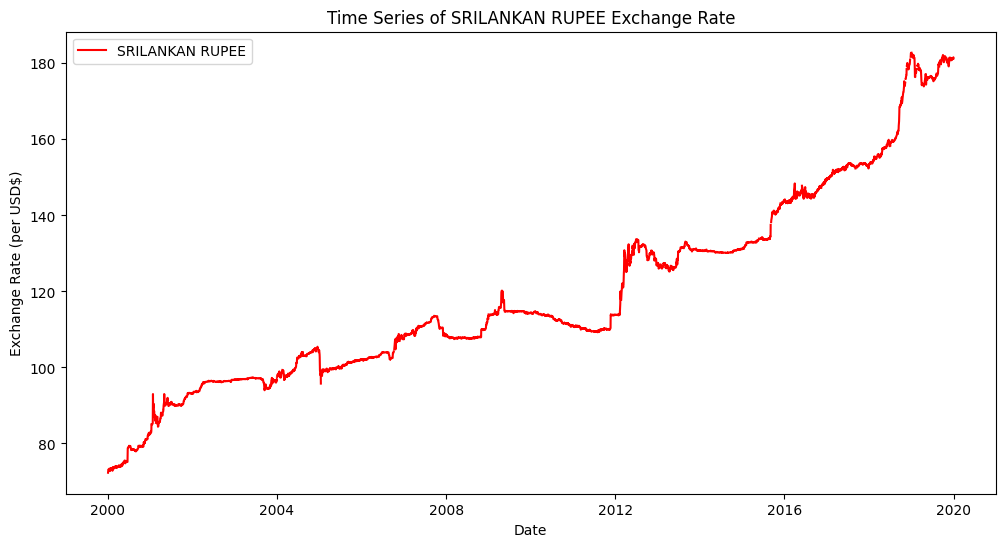

In [ ]:
#selecting currency

options = {
    'AUSTRALIAN DOLLAR': 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
    'EURO': 'EURO AREA - EURO/US$',
    'NEW ZEALAND DOLLAR': 'NEW ZEALAND - NEW ZEALAND DOLLAR/US$',
    'GREAT BRITAIN POUNDS': 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
    'BRAZILIAN REAL': 'BRAZIL - REAL/US$',
    'CANADIAN DOLLAR': 'CANADA - CANADIAN DOLLAR/US$',
    'CHINESE YUAN$': 'CHINA - YUAN/US$',
    'HONG KONG DOLLAR': 'HONG KONG - HONG KONG DOLLAR/US$',
    'INDIAN RUPEE': 'INDIA - INDIAN RUPEE/US$',
    'KOREAN WON$': 'KOREA - WON/US$',
    'MEXICAN PESO': 'MEXICO - MEXICAN PESO/US$',
    'SOUTH AFRICAN RAND$': 'SOUTH AFRICA - RAND/US$',
    'SINGAPORE DOLLAR': 'SINGAPORE - SINGAPORE DOLLAR/US$',
    'DANISH KRONE': 'DENMARK - DANISH KRONE/US$',
    'JAPANESE YEN$': 'JAPAN - YEN/US$',
    'MALAYSIAN RINGGIT': 'MALAYSIA - RINGGIT/US$',
    'NORWEGIAN KRONE': 'NORWAY - NORWEGIAN KRONE/US$',
    'SWEDEN KRONA': 'SWEDEN - KRONA/US$',
    'SRILANKAN RUPEE': 'SRI LANKA - SRI LANKAN RUPEE/US$',
    'SWISS FRANC': 'SWITZERLAND - FRANC/US$',
    'NEW TAIWAN DOLLAR': 'TAIWAN - NEW TAIWAN DOLLAR/US$',
    'THAI BAHT': 'THAILAND - BAHT/US$'
}

selected_option = 'SRILANKAN RUPEE' #select currency here to train model
print(f"This graph shows the historical exchange rate of {selected_option} against the USD over time.")
plt.figure(figsize=(12, 6))
plt.plot(data['Time Serie'], data['SRI LANKA - SRI LANKAN RUPEE/US$'], label=selected_option, color='red')
plt.title(f'Time Series of {selected_option} Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (per USD$)')
plt.legend()
plt.show()

This boxplot displays the distribution of Sri Lankan Rupee exchange rates


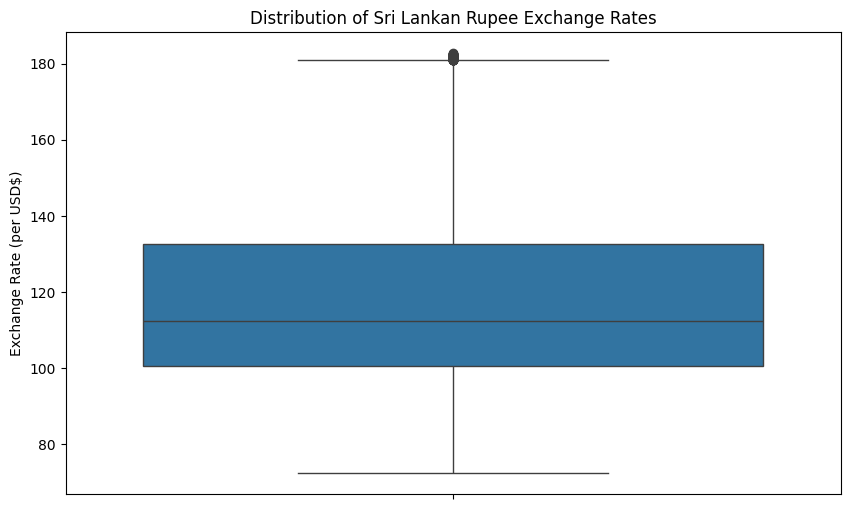

In [ ]:
#distribution plot - boxplot
print("This boxplot displays the distribution of Sri Lankan Rupee exchange rates")
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['SRI LANKA - SRI LANKAN RUPEE/US$'])
plt.title('Distribution of Sri Lankan Rupee Exchange Rates')
plt.ylabel('Exchange Rate (per USD$)')
plt.show()

In [ ]:
#predictive modelling code here
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

def prepare_data(data, target_col, test_days=10):
    """Split data into train and test sets"""
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)
    data_sorted = data.sort_values('Time Serie').reset_index(drop=True)
    # Calculate split point: everything except last 'test_days' for training
    split_point = len(data_sorted) - test_days
    # Split into training set (all data except last test_days)
    train = data_sorted.iloc[:split_point].copy()
    # Test set is the last test_days observations
    test = data_sorted.iloc[split_point:].copy()
    return train, test, data_sorted

def calculate_metrics(y_true, y_pred):
    """Calculate RMSE, MAE and MAPE"""
    mask = ~(np.isnan(y_true) | np.isnan(y_pred))
    y_true_clean = y_true[mask]
    y_pred_clean = y_pred[mask]
    rmse = sqrt(mean_squared_error(y_true_clean, y_pred_clean))
    mape = np.mean(np.abs((y_true_clean - y_pred_clean ) / y_true_clean)) * 100
    mae = mean_absolute_error(y_true_clean, y_pred_clean )
    return rmse, mape, mae

target_col = 'THAILAND - BAHT/US$'
train_data, test_data, full_data = prepare_data(data, target_col)

print(f"Training data: {len(train_data)} records")
print(f"Test data: {len(test_data)} records")
print(f"Total data: {len(full_data)} records")

results = {}

Training data: 5207 records
Test data: 10 records
Total data: 5217 records


In [ ]:
# we are using autots library for predictive modelling as an example. Please compare different models(Traditional ML, DeepLearning or Transformers) and select the bestmodel.

selected_option = 'THAI BAHT'
target_col = options[selected_option]

def autots_model_debug(train, test, selected_option):
    try:
        # Prepare data
        autots_data = train[['Time Serie', target_col]].copy()
        autots_data.columns = ['Time Serie', 'value']

        forecast_length = len(test)
        print(f"Forecast length: {forecast_length}")

        # Create model
        model = AutoTS(forecast_length=forecast_length, frequency='D', ensemble='simple',drop_data_older_than_periods=200, max_generations=2, num_validations=1)
        model = model.fit(autots_data, date_col='Time Serie', value_col='value', id_col=None)

        prediction = model.predict()
        forecast = prediction.forecast['value'].values

        if np.all(np.isnan(forecast)):
            # If all values are NaN, last training value will be used
            forecast = np.full(len(forecast), train_data[target_col].iloc[-1])
            print("   Replaced all NaN with last training value")

        if len(forecast) != len(test):
            print(f"Warning: Forecast length mismatch - expected {len(test)}, got {len(forecast)}")

        print(f"Best model: {model.best_model_name}")
        return forecast

    except Exception as e:
        print(f"Error in AutoTS: {e}")
        import traceback
        traceback.print_exc()
        return None

# Run the model
autots_forecast = autots_model_debug(train_data, test_data, selected_option)

if autots_forecast is not None:
    autots_rmse, autots_mape, autots_mae = calculate_metrics(test_data[target_col].values, autots_forecast)
    results['AutoTS'] = {
        'RMSE': autots_rmse,
        'MAPE': autots_mape,
        'MAE': autots_mae,
        'forecast': autots_forecast
    }
    print(f"AutoTS completed: RMSE={autots_rmse:.4f}, MAE={autots_mae:.4f}, MAPE={autots_mape:.4f}")
else:
    print("AutoTS failed")

Forecast length: 10
Using 1 cpus for n_jobs.
Data frequency is: B, used frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 2
Model Number: 2 with model AverageValueNaive in generation 0 of 2
Model Number: 3 with model AverageValueNaive in generation 0 of 2
Model Number: 4 with model DatepartRegression in generation 0 of 2
Model Number: 5 with model DatepartRegression in generation 0 of 2


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 6 with model DatepartRegression in generation 0 of 2


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 2


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - loss: 0.3659
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3558
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3473
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3467
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3419
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3370
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3269
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3188
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.3088
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2951
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.2777
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2606
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.2437
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2400
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.2387
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:3475: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 21 with model VAR in generation 0 of 2
Template Eval Error: ValueError('Only gave one variable to VAR') in model 21 in generation 0: VAR
Model Number: 22 with model VAR in generation 0 of 2
Template Eval Error: ValueError('Only gave one variable to VAR') in model 22 in generation 0: VAR
Model Number: 23 with model WindowRegression in generation 0 of 2
Model Number: 24 with model ConstantNaive in generation 0 of 2


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 25 with model FBProphet in generation 0 of 2
Template Eval Error: AttributeError("'Prophet' object has no attribute 'stan_backend'") in model 25 in generation 0: FBProphet
Model Number: 26 with model DatepartRegression in generation 0 of 2
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 26 in generation 0: DatepartRegression
Model Number: 27 with model SeasonalNaive in generation 0 of 2
Model Number: 28 with model DatepartRegression in generation 0 of 2
Model Number: 29 with model ETS in generation 0 of 2
Model Number: 30 with model ARDL in generation 0 of 2
Model Number: 31 with model UnivariateMotif in generation 0 of 2
Model Number: 32 with model UnivariateMotif in generation 0 of 2
Model Number: 33 with model SectionalMotif in generation 0 of 2
Model Number: 34 with model SectionalMotif in generation 0 of 2
Model Number: 35 with model FBProphet in generation 0 of 2
Template Eval Error: AttributeError("'Prophet' object 

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 57 with model ARDL in generation 0 of 2
Model Number: 58 with model ARCH in generation 0 of 2
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 58 in generation 0: ARCH
Model Number: 59 with model ConstantNaive in generation 0 of 2
Model Number: 60 with model LastValueNaive in generation 0 of 2
Model Number: 61 with model AverageValueNaive in generation 0 of 2
Model Number: 62 with model GLS in generation 0 of 2
Model Number: 63 with model SeasonalNaive in generation 0 of 2
Model Number: 64 with model VAR in generation 0 of 2
Template Eval Error: ValueError('Only gave one variable to VAR') in model 64 in generation 0: VAR
Model Number: 65 with model WindowRegression in generation 0 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 66 with model DatepartRegression in generation 0 of 2
Template Eval Error: IndexError('tuple index out of range') in model 66 in generation 0: DatepartRegression
Model Number: 67 with model SectionalMotif in generation 0 of 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 68 with model RRVAR in generation 0 of 2
Model Number: 69 with model MetricMotif in generation 0 of 2
Model Number: 70 with model Cassandra in generation 0 of 2
Template Eval Error: ValueError('Shape of passed values is (130, 4), indices imply (130, 2)') in model 70 in generation 0: Cassandra
Model Number: 71 with model SeasonalityMotif in generation 0 of 2
Model Number: 72 with model FFT in generation 0 of 2
Model Number: 73 with model BasicLinearModel in generation 0 of 2
Model Number: 74 with model MetricMotif in generation 0 of 2
Model Number: 75 with model GLS in generation 0 of 2
Model Number: 76 with model SeasonalityMotif in generation 0 of 2
Model Number: 77 with model ETS in generation 0 of 2
Model Number: 78 with model ConstantNaive in generation 0 of 2
Model Number: 79 with model SectionalMotif in generation 0 of 2
Model Number: 80 with model SectionalMotif in generation 0 of 2
Model Number: 81 with model DatepartRegression in generation 0 of 2
Template Eval E

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 87 with model FBProphet in generation 0 of 2
Template Eval Error: AttributeError("'Prophet' object has no attribute 'stan_backend'") in model 87 in generation 0: FBProphet
Model Number: 88 with model ConstantNaive in generation 0 of 2
Model Number: 89 with model WindowRegression in generation 0 of 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Sta

Model Number: 90 with model ETS in generation 0 of 2
Model Number: 91 with model UnivariateMotif in generation 0 of 2
Model Number: 92 with model SeasonalityMotif in generation 0 of 2
Model Number: 93 with model DatepartRegression in generation 0 of 2
Model Number: 94 with model FFT in generation 0 of 2
Model Number: 95 with model UnivariateMotif in generation 0 of 2
Model Number: 96 with model FBProphet in generation 0 of 2
No anomalies detected.
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 96 in generation 0: FBProphet
Model Number: 97 with model ARCH in generation 0 of 2
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 97 in generation 0: ARCH
Model Number: 98 with model DatepartRegression in generation 0 of 2
Model Number: 99 with model BasicLinearModel in generation 0 of 2
Model Number: 100 with model FFT in generation 0 of 2
Model Number: 101 with model LastValueNaive in generation 0 

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 106 with model VAR in generation 0 of 2
Template Eval Error: ValueError('Only gave one variable to VAR') in model 106 in generation 0: VAR
Model Number: 107 with model ARCH in generation 0 of 2
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 107 in generation 0: ARCH
Model Number: 108 with model SeasonalityMotif in generation 0 of 2
Model Number: 109 with model ETS in generation 0 of 2
Model Number: 110 with model ConstantNaive in generation 0 of 2
Model Number: 111 with model SeasonalNaive in generation 0 of 2
Model Number: 112 with model SectionalMotif in generation 0 of 2
Model Number: 113 with model LastValueNaive in generation 0 of 2
Model Number: 114 with model GLM in generation 0 of 2
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 114 in generation 0: GLM
Model Number: 115 with model MetricMotif in generation 0 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 116 with model GLM in generation 0 of 2
2019-12-08 00:00:00
2019-12-08 00:00:00
2019-12-08 00:00:00
Template Eval Error: ValueError('Model GLM returned improper forecast_length. Returned: 6 and requested: 10') in model 116 in generation 0: GLM
Model Number: 117 with model FFT in generation 0 of 2
Model Number: 118 with model ConstantNaive in generation 0 of 2
Model Number: 119 with model SeasonalityMotif in generation 0 of 2
Model Number: 120 with model GLM in generation 0 of 2
Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecast_nan=True') in model 120 in generation 0: GLM
Model Number: 121 with model AverageValueNaive in generation 0 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


Model Number: 122 with model UnivariateMotif in generation 0 of 2
Model Number: 123 with model FFT in generation 0 of 2
Model Number: 124 with model ConstantNaive in generation 0 of 2
Model Number: 125 with model GLS in generation 0 of 2
Model Number: 126 with model VAR in generation 0 of 2
Template Eval Error: ValueError('Only gave one variable to VAR') in model 126 in generation 0: VAR
Model Number: 127 with model GLS in generation 0 of 2
Model Number: 128 with model ETS in generation 0 of 2
Model Number: 129 with model GLS in generation 0 of 2
Model Number: 130 with model ARCH in generation 0 of 2
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 130 in generation 0: ARCH
Model Number: 131 with model VAR in generation 0 of 2
Template Eval Error: ValueError('Only gave one variable to VAR') in model 131 in generation 0: VAR
Model Number: 132 with model SectionalMotif in generation 0 of 2
Model Number: 133 with model UnivariateMotif in generation 0 

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 140 with model ETS in generation 0 of 2
Model Number: 141 with model SeasonalityMotif in generation 0 of 2
Model Number: 142 with model SeasonalNaive in generation 0 of 2
Model Number: 143 with model ARDL in generation 0 of 2
Model Number: 144 with model AverageValueNaive in generation 0 of 2
Model Number: 145 with model ARDL in generation 0 of 2
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 145 in generation 0: ARDL
Model Number: 146 with model SeasonalityMotif in generation 0 of 2
Model Number: 147 with model MetricMotif in generation 0 of 2
Model Number: 148 with model SeasonalityMotif in generation 0 of 2
Model Number: 149 with model FBProphet in generation 0 of 2
No anomalies detected.
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 149 in generation 0: FBProphet
Model Number: 150 with model SectionalMotif in generation 0 of 2
Model Number: 151 with model Se

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 162 with model LastValueNaive in generation 1 of 2
Model Number: 163 with model SectionalMotif in generation 1 of 2
Model Number: 164 with model DatepartRegression in generation 1 of 2
Model Number: 165 with model SectionalMotif in generation 1 of 2
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 165 in generation 1: SectionalMotif
Model Number: 166 with model SeasonalityMotif in generation 1 of 2
Model Number: 167 with model MetricMotif in generation 1 of 2
Model Number: 168 with model MetricMotif in generation 1 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 169 with model SeasonalNaive in generation 1 of 2
Model Number: 170 with model ETS in generation 1 of 2
Model Number: 171 with model UnivariateMotif in generation 1 of 2
Model Number: 172 with model SeasonalityMotif in generation 1 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 173 with model AverageValueNaive in generation 1 of 2
Template Eval Error: Exception('Transformer PCA failed on fit from params time {\'0\': {\'model\': \'Linear\', \'phi\': 1, \'window\': None, \'transform_dict\': None}, \'1\': {\'whiten\': False, \'n_components\': 4}, \'2\': {}, \'3\': {}, \'4\': {}} with error ValueError("n_components=4 must be between 0 and min(n_samples, n_features)=1 with svd_solver=\'covariance_eigh\'")') in model 173 in generation 1: AverageValueNaive
Model Number: 174 with model MetricMotif in generation 1 of 2
Model Number: 175 with model LastValueNaive in generation 1 of 2
Model Number: 176 with model FFT in generation 1 of 2
Model Number: 177 with model ETS in generation 1 of 2
Model Number: 178 with model UnivariateMotif in generation 1 of 2
Model Number: 179 with model UnivariateMotif in generation 1 of 2
Model Number: 180 with model UnivariateMotif in generation 1 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 181 with model SeasonalNaive in generation 1 of 2
Model Number: 182 with model DatepartRegression in generation 1 of 2
Template Eval Error: IndexError('tuple index out of range') in model 182 in generation 1: DatepartRegression
Model Number: 183 with model Cassandra in generation 1 of 2
Model Number: 184 with model SeasonalityMotif in generation 1 of 2
Model Number: 185 with model SectionalMotif in generation 1 of 2
2019-12-08 00:00:00
2019-12-08 00:00:00
2019-12-08 00:00:00
Template Eval Error: ValueError('Model SectionalMotif returned improper forecast_length. Returned: 6 and requested: 10') in model 185 in generation 1: SectionalMotif
Model Number: 186 with model DatepartRegression in generation 1 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.1351
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0605
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0549
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0536
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0468
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0509
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0444
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0442
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0463
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0408
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0398
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0356
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0376
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0306
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0268
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 197 with model GLS in generation 1 of 2
Model Number: 198 with model SectionalMotif in generation 1 of 2
Model Number: 199 with model ETS in generation 1 of 2
Model Number: 200 with model SeasonalityMotif in generation 1 of 2
Model Number: 201 with model SeasonalityMotif in generation 1 of 2
Model Number: 202 with model SeasonalityMotif in generation 1 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 203 with model ARDL in generation 1 of 2
Model Number: 204 with model AverageValueNaive in generation 1 of 2
Model Number: 205 with model GLS in generation 1 of 2
Model Number: 206 with model AverageValueNaive in generation 1 of 2
Template Eval Error: Exception("Transformer BTCD failed on fit from params mean {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.4, 0.6]}, 'fillna': 'ffill', 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 6}}}, 'isolated_only': False, 'on_inverse': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in mode

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 212 with model LastValueNaive in generation 1 of 2
Model Number: 213 with model LastValueNaive in generation 1 of 2
Model Number: 214 with model BasicLinearModel in generation 1 of 2
Model Number: 215 with model UnivariateMotif in generation 1 of 2
Model Number: 216 with model ARDL in generation 1 of 2
Model Number: 217 with model ARDL in generation 1 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 218 with model FFT in generation 1 of 2
Model Number: 219 with model GLS in generation 1 of 2
Model Number: 220 with model FFT in generation 1 of 2
Model Number: 221 with model DatepartRegression in generation 1 of 2
Template Eval Error: IndexError('tuple index out of range') in model 221 in generation 1: DatepartRegression
Model Number: 222 with model ConstantNaive in generation 1 of 2
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'window': 24}, '2': {'sigma': 0.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 2}}, 'datepart_method': [7, 365.25], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilte

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Template Eval Error: IndexError('index 68 is out of bounds for axis 0 with size 1') in model 229 in generation 1: UnivariateMotif
Model Number: 230 with model SectionalMotif in generation 1 of 2
Model Number: 231 with model SectionalMotif in generation 1 of 2
Model Number: 232 with model ARDL in generation 1 of 2
Model Number: 233 with model FFT in generation 1 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 234 with model DatepartRegression in generation 1 of 2
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0040
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0037
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0034
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0034
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0034
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0031
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0030
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0031
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0031
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 247 with model BasicLinearModel in generation 1 of 2
Model Number: 248 with model SeasonalNaive in generation 1 of 2
Model Number: 249 with model ARDL in generation 1 of 2
Model Number: 250 with model SeasonalNaive in generation 1 of 2
Model Number: 251 with model SeasonalNaive in generation 1 of 2
Model Number: 252 with model SeasonalityMotif in generation 1 of 2
Model Number: 253 with model UnivariateMotif in generation 1 of 2
Model Number: 254 with model MetricMotif in generation 1 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 255 with model SeasonalityMotif in generation 1 of 2
Model Number: 256 with model LastValueNaive in generation 1 of 2
Model Number: 257 with model AverageValueNaive in generation 1 of 2
Model Number: 258 with model SectionalMotif in generation 1 of 2
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 258 in generation 1: SectionalMotif
Model Number: 259 with model ConstantNaive in generation 1 of 2
Model Number: 260 with model GLM in generation 1 of 2
Model Number: 261 with model GLS in generation 1 of 2
Model Number: 262 with model UnivariateMotif in generation 1 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


New Generation: 2 of 2
Model Number: 263 with model FFT in generation 2 of 2
Model Number: 264 with model BasicLinearModel in generation 2 of 2
Model Number: 265 with model AverageValueNaive in generation 2 of 2
Model Number: 266 with model SectionalMotif in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 267 with model UnivariateMotif in generation 2 of 2
Model Number: 268 with model ARDL in generation 2 of 2
Model Number: 269 with model UnivariateMotif in generation 2 of 2
Model Number: 270 with model ARDL in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 271 with model GLM in generation 2 of 2
Model Number: 272 with model UnivariateMotif in generation 2 of 2
Model Number: 273 with model AverageValueNaive in generation 2 of 2
Model Number: 274 with model AverageValueNaive in generation 2 of 2
Model Number: 275 with model ConstantNaive in generation 2 of 2
Model Number: 276 with model BasicLinearModel in generation 2 of 2
Model Number: 277 with model ETS in generation 2 of 2
Model Number: 278 with model MetricMotif in generation 2 of 2
Model Number: 279 with model SeasonalityMotif in generation 2 of 2
Model Number: 280 with model DatepartRegression in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 30.1078
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 29.8581
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29.5718
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 29.1947
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 28.6989
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 28.0464
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 27.2833
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26.3567
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 25.4396
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 24.5010
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 23.6369
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.8849
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.2076
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.5831
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.0624
Epoch 16/50
6/6 ━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 284 with model SeasonalityMotif in generation 2 of 2
Model Number: 285 with model UnivariateMotif in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 286 with model SectionalMotif in generation 2 of 2
Model Number: 287 with model ARDL in generation 2 of 2
Model Number: 288 with model MetricMotif in generation 2 of 2
Template Eval Error: Exception("Transformer MinMaxScaler failed on fit from params time {'0': {}, '1': {'low': 6, 'high': 364, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '2': {'part': 'trend', 'lamb': 1600}, '3': {}} with error ValueError('Shape of passed values is (188, 1), indices imply (190, 1)')") in model 288 in generation 2: MetricMotif
Model Number: 289 with model FFT in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 290 with model WindowRegression in generation 2 of 2
Model Number: 291 with model SectionalMotif in generation 2 of 2
Model Number: 292 with model RRVAR in generation 2 of 2
Model Number: 293 with model LastValueNaive in generation 2 of 2
Model Number: 294 with model SeasonalNaive in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Sta

Model Number: 295 with model ConstantNaive in generation 2 of 2
Model Number: 296 with model ConstantNaive in generation 2 of 2
Model Number: 297 with model SeasonalityMotif in generation 2 of 2
Model Number: 298 with model SeasonalityMotif in generation 2 of 2
Model Number: 299 with model BasicLinearModel in generation 2 of 2
Model Number: 300 with model SectionalMotif in generation 2 of 2
Model Number: 301 with model BasicLinearModel in generation 2 of 2
Model Number: 302 with model SeasonalNaive in generation 2 of 2
Model Number: 303 with model FFT in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/autots/models/basics.py:3647: RuntimeWarning: invalid value encountered in sqrt
  self.sigma = np.sqrt(sse / (n - p))


Model Number: 304 with model ETS in generation 2 of 2
Model Number: 305 with model SeasonalityMotif in generation 2 of 2
Model Number: 306 with model UnivariateMotif in generation 2 of 2
Model Number: 307 with model AverageValueNaive in generation 2 of 2
Model Number: 308 with model LastValueNaive in generation 2 of 2
Model Number: 309 with model SectionalMotif in generation 2 of 2
Model Number: 310 with model AverageValueNaive in generation 2 of 2
Model Number: 311 with model MetricMotif in generation 2 of 2
Template Eval Error: ValueError('operands could not be broadcast together with shapes (40,1) (10,1) ') in model 311 in generation 2: MetricMotif
Model Number: 312 with model SeasonalityMotif in generation 2 of 2
Model Number: 313 with model ConstantNaive in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 314 with model SeasonalNaive in generation 2 of 2
Model Number: 315 with model ARDL in generation 2 of 2
Model Number: 316 with model MetricMotif in generation 2 of 2
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 316 in generation 2: MetricMotif
Model Number: 317 with model UnivariateMotif in generation 2 of 2
Model Number: 318 with model LastValueNaive in generation 2 of 2

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)



Model Number: 319 with model GLS in generation 2 of 2
Model Number: 320 with model ARDL in generation 2 of 2
Model Number: 321 with model ConstantNaive in generation 2 of 2
Model Number: 322 with model FFT in generation 2 of 2
Model Number: 323 with model MetricMotif in generation 2 of 2
Model Number: 324 with model SeasonalityMotif in generation 2 of 2
Model Number: 325 with model LastValueNaive in generation 2 of 2
Model Number: 326 with model DatepartRegression in generation 2 of 2
Model Number: 327 with model FFT in generation 2 of 2
Model Number: 328 with model SeasonalityMotif in generation 2 of 2
Model Number: 329 with model BasicLinearModel in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 330 with model Cassandra in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 331 with model MetricMotif in generation 2 of 2
Model Number: 332 with model DatepartRegression in generation 2 of 2
Model Number: 333 with model ARDL in generation 2 of 2
Model Number: 334 with model DatepartRegression in generation 2 of 2
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 334 in generation 2: DatepartRegression
Model Number: 335 with model GLM in generation 2 of 2
Model Number: 336 with model BasicLinearModel in generation 2 of 2
Model Number: 337 with model SeasonalityMotif in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 338 with model AverageValueNaive in generation 2 of 2
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {'decimals': 1, 'on_transform': True, 'on_inverse': True}, '2': {'method': '3forecastlength'}, '3': {}} with error ValueError('BTCD only works on multivarate series')") in model 338 in generation 2: AverageValueNaive
Model Number: 339 with model UnivariateMotif in generation 2 of 2
Model Number: 340 with model AverageValueNaive in generation 2 of 2
Model Number: 341 with model DatepartRegression in generation 2 of 2
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 341 in generation 2: DatepartRegression
Model Number: 342 with model ETS in generation 2 of 2
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params ffill {\'0\': {}, \'1\': {\'window_size\': 90, \'alpha\': 3.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 344 with model GLS in generation 2 of 2
Model Number: 345 with model LastValueNaive in generation 2 of 2
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': True, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'chi2', 'alpha': 0.05, 'rolling_periods': 200, 'center': True}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'mod

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.2151
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1329
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0773
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0478
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0512
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0486
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0440
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0470
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0441
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0407
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0376
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0319
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0358
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0360
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0309
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 358 with model AverageValueNaive in generation 2 of 2
Model Number: 359 with model UnivariateMotif in generation 2 of 2
Model Number: 360 with model AverageValueNaive in generation 2 of 2
Template Eval Error: ValueError('operands could not be broadcast together with shapes (40,1) (10,1) ') in model 360 in generation 2: AverageValueNaive
Model Number: 361 with model SeasonalityMotif in generation 2 of 2
Model Number: 362 with model BasicLinearModel in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Model Number: 363 with model SectionalMotif in generation 2 of 2
Template Eval Error: Exception("Transformer Cointegration failed on fit from params nearest {'0': {'det_order': 1, 'k_ar_diff': 0}, '1': {'rows': 1}} with error ValueError('Coint only works on multivarate series')") in model 363 in generation 2: SectionalMotif
Model Number: 364 with model LastValueNaive in generation 2 of 2
Model Number: 365 with model SeasonalityMotif in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/autots/models/basics.py:3647: RuntimeWarning: invalid value encountered in sqrt
  self.sigma = np.sqrt(sse / (n - p))


Model Number: 366 with model AverageValueNaive in generation 2 of 2
Model Number: 367 with model UnivariateMotif in generation 2 of 2


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Ensembling Error: AttributeError("'AutoTS' object has no attribute 'ensemble_templates'"): Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/autots/evaluator/auto_ts.py", line 1455, in fit
    self.ensemble_templates,
    ^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'AutoTS' object has no attribute 'ensemble_templates'

Validation Round: 1
Model Number: 1 of 56 with model SectionalMotif for Validation 1
📈 1 - SectionalMotif with avg smape 0.08: 
Model Number: 2 of 56 with model UnivariateMotif for Validation 1
2 - UnivariateMotif with avg smape 0.32: 
Model Number: 3 of 56 with model MetricMotif for Validation 1
3 - MetricMotif with avg smape 0.18: 
Model Number: 4 of 56 with model SectionalMotif for Validation 1
4 - SectionalMotif with avg smape 0.18: 
Model Number: 5 of 56 with model AverageValueNaive for Validation 1


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


5 - AverageValueNaive with avg smape 0.53: 
Model Number: 6 of 56 with model SectionalMotif for Validation 1
6 - SectionalMotif with avg smape 0.22: 
Model Number: 7 of 56 with model UnivariateMotif for Validation 1
7 - UnivariateMotif with avg smape 0.2: 
Model Number: 8 of 56 with model AverageValueNaive for Validation 1
8 - AverageValueNaive with avg smape 0.51: 
Model Number: 9 of 56 with model SectionalMotif for Validation 1
9 - SectionalMotif with avg smape 0.11: 
Model Number: 10 of 56 with model UnivariateMotif for Validation 1


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


10 - UnivariateMotif with avg smape 0.14: 
Model Number: 11 of 56 with model UnivariateMotif for Validation 1
11 - UnivariateMotif with avg smape 0.11: 
Model Number: 12 of 56 with model AverageValueNaive for Validation 1
12 - AverageValueNaive with avg smape 0.53: 
Model Number: 13 of 56 with model FFT for Validation 1


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


13 - FFT with avg smape 0.21: 
Model Number: 14 of 56 with model SeasonalityMotif for Validation 1
14 - SeasonalityMotif with avg smape 0.46: 
Model Number: 15 of 56 with model AverageValueNaive for Validation 1
15 - AverageValueNaive with avg smape 0.25: 
Model Number: 16 of 56 with model ARDL for Validation 1
16 - ARDL with avg smape 0.21: 
Model Number: 17 of 56 with model LastValueNaive for Validation 1
17 - LastValueNaive with avg smape 0.33: 
Model Number: 18 of 56 with model ARDL for Validation 1


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


18 - ARDL with avg smape 160.24: 
Model Number: 19 of 56 with model SeasonalityMotif for Validation 1
19 - SeasonalityMotif with avg smape 0.3: 
Model Number: 20 of 56 with model DatepartRegression for Validation 1


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

def arima_model(train, test, order=(2,1,2)):
    """ARIMA model implementation"""
    try:
        # p=2: autoregressive terms, d=1: differencing, q=2: moving average terms
        model = ARIMA(train[target_col], order=order)
        fitted_model = model.fit()
        forecast = fitted_model.forecast(steps=len(test))
        return forecast
    except Exception as e:
        # If ARIMA fails, print error and return naive forecast (last known value)
        print(f"ARIMA Error: {e}")
        return np.array([train[target_col].iloc[-1]] * len(test))

def sarima_model(train, test, order=(1,1,1), seasonal_order=(1,1,1,12)):
    """SARIMA model implementation with seasonal components"""
    try:
        # seasonal_order: (P,D,Q,s) where s=12 for monthly seasonality
        model = SARIMAX(train[target_col], order=order, seasonal_order=seasonal_order)
        # Fit model without displaying convergence messages
        fitted_model = model.fit(disp=False)
        # Generate forecasts
        forecast = fitted_model.forecast(steps=len(test))
        return forecast
    except Exception as e:
        # If SARIMA fails, fall back to regular ARIMA
        print(f"SARIMA Error: {e}")
        return arima_model(train, test)

# Run ARIMA/SARIMA models
print("Training ARIMA...")
# Get ARIMA forecasts
arima_forecast = arima_model(train_data, test_data)
arima_rmse, arima_mape, arima_mae = calculate_metrics(test_data[target_col].values, arima_forecast)
results['ARIMA'] = {'RMSE': arima_rmse, 'MAPE': arima_mape, 'MAE': arima_mae, 'forecast': arima_forecast}

print("Training SARIMA...")
# Get SARIMA forecasts
sarima_forecast = sarima_model(train_data, test_data)
sarima_rmse, sarima_mape, sarima_mae = calculate_metrics(test_data[target_col].values, sarima_forecast)
results['SARIMA'] = {'RMSE': sarima_rmse, 'MAPE': sarima_mape, 'MAE': sarima_mae, 'forecast': sarima_forecast}

Training ARIMA...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Training SARIMA...


In [ ]:
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'RMSE': [results[model]['RMSE'] for model in results],
    'MAE': [results[model]['MAE'] for model in results],
    'MAPE': [results[model]['MAPE'] for model in results]
}).sort_values('RMSE')

print(results_df.to_string(index=False))

 Model     RMSE      MAE     MAPE
SARIMA 0.200904 0.140181 0.468068
 ARIMA 0.203427 0.144652 0.482913
AutoTS 0.245237 0.170615 0.569676


In [ ]:
"""
SARIMA is the best model for Sri Lankan
 Model     RMSE      MAE     MAPE
SARIMA 0.141592 0.108047 0.059583
 ARIMA 0.195276 0.163584 0.090193
AutoTS 0.519132 0.442580 0.244009

AutoTS is the best model for AUSTRALIAN DOLLAR
 Model     RMSE      MAE     MAPE
AutoTS 0.014771 0.010338 0.722289
SARIMA 0.021645 0.018335 1.278091
 ARIMA 0.021692 0.018604 1.296576

ARIMA is the best model for EURO
 Model     RMSE      MAE     MAPE
 ARIMA 0.004490 0.004189 0.466551
SARIMA 0.004956 0.004622 0.514403
AutoTS 0.004986 0.004244 0.471390

# is the best model for

ARIMA is the best model for GREAT BRITAIN POUNDS
 Model     RMSE      MAE     MAPE
 ARIMA 0.006614 0.005593 0.729144
SARIMA 0.006759 0.005729 0.747124
AutoTS 0.011692 0.008423 1.106457

ARIMA is the best model for BRAZILIAN REAL
 Model     RMSE      MAE     MAPE
 ARIMA 0.026390 0.020205 0.500182
SARIMA 0.027117 0.020723 0.513112
AutoTS 0.050810 0.045186 1.113069

AutoTS is the best model for CANADIAN DOLLAR
 Model     RMSE      MAE     MAPE
AutoTS 0.007718 0.005601 0.429295
 ARIMA 0.007977 0.005622 0.431053
SARIMA 0.008053 0.005683 0.435669

AutoTS is the best model for CHINESE YUAN$
 Model     RMSE      MAE     MAPE
AutoTS 0.012166 0.008167 0.116941
SARIMA 0.013707 0.010298 0.147325
 ARIMA 0.014792 0.011389 0.162933

ARIMA is the best model for HONG KONG DOLLAR
  Model     RMSE      MAE     MAPE
 ARIMA 0.003935 0.003311 0.042500
AutoTS 0.003997 0.003200 0.041072
SARIMA 0.004184 0.003215 0.041265

AutoTS is the best model for INDIAN RUPEE
 Model     RMSE      MAE     MAPE
AutoTS 0.217411 0.196815 0.276083
SARIMA 0.219569 0.187945 0.263582
 ARIMA 0.229247 0.195324 0.273919

ARIMA is the best model for KOREAN WON$
 Model     RMSE      MAE     MAPE
 ARIMA 5.809945 4.824655 0.416262
SARIMA 6.656998 5.692389 0.491037
AutoTS 9.654174 8.875815 0.765236

ARIMA is the best model for MEXICAN PESO
 Model     RMSE      MAE     MAPE
 ARIMA 0.047147 0.039204 0.207574
SARIMA 0.053985 0.045190 0.239272
AutoTS 0.069915 0.058531 0.309996

ARIMA is the best model for SOUTH AFRICAN RAND$
 Model     RMSE      MAE     MAPE
 ARIMA 0.285773 0.267517 1.896994
SARIMA 0.292989 0.272099 1.929807
AutoTS 0.399712 0.392462 2.779341

AutoTS is the best model for SINGAPORE DOLLAR
 Model     RMSE      MAE     MAPE
AutoTS 0.003580 0.002203 0.163412
SARIMA 0.003889 0.002565 0.190185
 ARIMA 0.004101 0.002506 0.185904

AutoTS is the best model for DANISH KRONE
 Model     RMSE      MAE     MAPE
AutoTS 0.033068 0.027244 0.404916
 ARIMA 0.033311 0.031195 0.465242
SARIMA 0.036416 0.034477 0.513729

ARIMA is the best model for JAPANESE YEN$
 Model     RMSE      MAE     MAPE
 ARIMA 0.388635 0.272313 0.249847
SARIMA 0.392303 0.271274 0.248905
AutoTS 0.491754 0.356583 0.327077

AutoTS is the best model for MALAYSIAN RINGGIT
 Model     RMSE      MAE     MAPE
AutoTS 0.014158 0.008150 0.198545
SARIMA 0.020885 0.012902 0.314163
 ARIMA 0.021200 0.013451 0.327478

AutoTS is the best model for NORWEGIAN KRONE
 Model     RMSE      MAE     MAPE
AutoTS 0.097135 0.079439 0.898282
SARIMA 0.146587 0.121639 1.375380
 ARIMA 0.147291 0.123073 1.391418

ARIMA is the best model for SWEDEN KRONA
Model     RMSE      MAE     MAPE
 ARIMA 0.043158 0.042157 0.449083
SARIMA 0.047528 0.046434 0.494486
AutoTS 0.061745 0.057586 0.612765

SARIMA is the best model for SWISS FRANC
Model     RMSE      MAE     MAPE
SARIMA 0.005977 0.004590 0.471927
AutoTS 0.006856 0.004544 0.468072
 ARIMA 0.006856 0.004544 0.468072

SARIMA is the best model for NEW TAIWAN DOLLAR
 Model     RMSE      MAE     MAPE
SARIMA 0.080964 0.045936 0.153166
 ARIMA 0.082557 0.049616 0.165386
AutoTS 0.168420 0.154806 0.514867

SARIMA is the best model for THAI BAHT
   Model     RMSE      MAE     MAPE
SARIMA 0.200904 0.140181 0.468068
 ARIMA 0.203427 0.144652 0.482913
AutoTS 0.245237 0.170615 0.569676
"""


In [ ]:
import pickle
import os
from datetime import datetime

os.makedirs('models', exist_ok=True)

def save_currency_model(currency_name, model_object, model_type, performance_metrics):
    model_data = {
        'Currency': currency_name,
        'Model': model_type,
        'RMSE': performance_metrics.get('RMSE'),
        'MAE': performance_metrics.get('MAE'),
        'MAPE': performance_metrics.get('MAPE'),
        'ModelObject': model_object
    }

    safe_currency_name = currency_name.replace(' ', '_').replace('/', '_').upper()
    filename = f"models/{safe_currency_name}_{model_type}_model.pkl"

    try:
        with open(filename, 'wb') as f:
            pickle.dump(model_data, f)

        print(f"Saved: {currency_name} | {model_type} | RMSE: {performance_metrics['RMSE']:.6f}")
        return filename

    except Exception as e:
        print(f"Error saving {currency_name} {model_type}: {e}")
        return None

    # Save the best model
    filename = save_currency_model(
        currency_name=currency_name,
        model_object=best_model_object,
        model_type=best_model_type,
        performance_metrics=best_metrics
    )

    return best_model_type, best_metrics, filename

In [ ]:
save_currency_model(
    currency_name="THAI BAHT",
    model_object=sarima_model,
    model_type="SARIMA",
    performance_metrics={'RMSE': 0.200904, 'MAE': 0.004590, 'MAPE': 0.468068}
)

Saved: THAI BAHT | SARIMA | RMSE: 0.200904


'models/THAI_BAHT_SARIMA_model.pkl'

In [ ]:
save_currency_model(
    currency_name="NORWEGIAN KRONE",
    model_object=autots_model_debug,
    model_type="AutoTS",
    performance_metrics={'RMSE': 0.097135, 'MAE': 0.140181, 'MAPE': 0.898282}
)

Saved: NORWEGIAN KRONE | AutoTS | RMSE: 0.097135


'models/NORWEGIAN_KRONE_AutoTS_model.pkl'

In [ ]:
save_currency_model(
    currency_name="SWEDEN KRONA",
    model_object=arima_model,
    model_type="ARIMA",
    performance_metrics={'RMSE': 0.043158, 'MAE': 0.042157, 'MAPE':0.449083}
)

Saved: SWEDEN KRONA | ARIMA | RMSE: 0.043158


'models/SWEDEN_KRONA_ARIMA_model.pkl'

In [4]:
#!pip install streamlit
#!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 4s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [7]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.196.226:8501

  Stopping...
